In [1]:
import geopandas as gpd
from shapely.geometry import Point
import fiona
import pandas as pd

In [13]:
from tobler.area_weighted.area_interpolate import _area_tables, _area_tables_binning
from scipy.sparse import dok_matrix, diags, coo_matrix
import numpy as np

In [6]:
liverpool = gpd.GeoSeries([Point(-2.93012,53.41471)], crs=4326)

In [2]:
clc = "/Users/martin/Downloads/u2018_clc2018_v2020_20u1_geoPackage/DATA/U2018_CLC2018_V2020_20u1.gpkg"

In [6]:
fiona.listlayers(clc)

['U2018_CLC2018_V2020_20u1',
 'U2018_CLC2018_V2020_20u1_FR_REU',
 'U2018_CLC2018_V2020_20u1_FR_GLP',
 'U2018_CLC2018_V2020_20u1_FR_GUF',
 'U2018_CLC2018_V2020_20u1_FR_MTQ',
 'U2018_CLC2018_V2020_20u1_FR_MYT']

In [7]:
lsoa = gpd.read_file("/Users/martin/Downloads/Lower_Layer_Super_Output_Areas__December_2011__Boundaries_Full_Clipped__BFC__EW_V3-shp/Lower_Layer_Super_Output_Areas__December_2011__Boundaries_Full_Clipped__BFC__EW_V3.shp",
                    mask=liverpool.to_crs(27700).buffer(5000))

In [8]:
corine = gpd.read_file(clc, layer='U2018_CLC2018_V2020_20u1', mask=liverpool.to_crs(3035).buffer(5000))

In [9]:
lsoa.shape, corine.shape

((268, 11), (33, 5))

<AxesSubplot:>

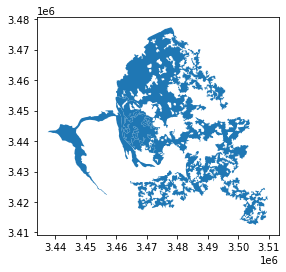

In [10]:
corine.plot()

<AxesSubplot:>

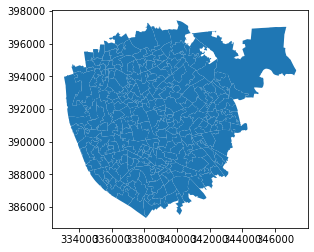

In [11]:
lsoa.plot()

In [12]:
corine = corine.to_crs(lsoa.crs)

In [43]:
un = corine.Code_18.unique()
mask = corine.Code_18 == un[2]

In [48]:
table[mask].sum(axis=0)

matrix([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 1.68743156e+05, 9.38381484e+04,
         7.74936157e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 3.12561191e+04, 4.33976172e+03,
         9.26038516e+04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 8.62129141e+04, 1.13462109e+05, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000

In [49]:
source_df = corine
target_df = lsoa
spatial_index = "auto"

In [50]:
table = _area_tables_binning(source_df, target_df, spatial_index)

In [73]:
categorical = pd.DataFrame(categorical, index=target_df.index)
categorical = categorical.div(target_df.area, axis='rows')

In [79]:
result = pd.concat([target_df, categorical], axis=1)

In [80]:
result.columns

Index(['OBJECTID', 'LSOA11CD', 'LSOA11NM', 'BNG_E', 'BNG_N', 'LONG_', 'LAT',
       'Shape_Leng', 'Shape__Are', 'Shape__Len', 'geometry', 'Code_18_522',
       'Code_18_111', 'Code_18_121', 'Code_18_123', 'Code_18_112',
       'Code_18_141', 'Code_18_142', 'Code_18_311', 'Code_18_211'],
      dtype='object')

<AxesSubplot:>

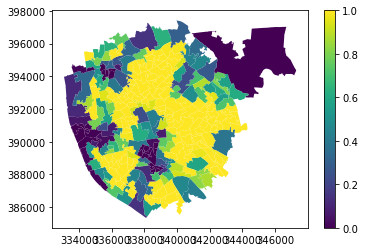

In [82]:
result.plot("Code_18_112", vmin=0, vmax=1, legend=True)

In [2]:
import seaborn

In [1]:
import urbangrammar_graphics as ugg

In [2]:
ugg.RGB

[(51, 52, 50),
 (59, 110, 141),
 (189, 91, 79),
 (144, 164, 126),
 (240, 200, 88),
 (149, 102, 110)]